# Assignment: Lab 03 - Computer Vision
## Krishu Wadhwa - euj7fh
## October 09, 2024

In [28]:
# imports 

import requests
import urllib.request
import streamlit as st
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1. To load the data, run the following code in a chunk:**

In [2]:
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test

The `y_test` and `y_train` vectors, for each index `i`, tell you what number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28x28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number.

To visualize this, run the following code to see the first ten numbers:


In [3]:
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # print the label
    print(X_test[i],'\n') # print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # make a contour plot of the matrix values
    plt.show()

7 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 198 198 198 19

/var/folders/8k/4kz648397lv0fw3qhymwqpk00000gn/T/ipykernel_54008/1106075888.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

**2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?**

In [4]:
# shape of x_train and x_test
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


The shapes of `X_train` and `X_test` indicate that there are 60,000 training images and 10,000 test images, and each are of size 28x28 pixels.

In [5]:
# shape of y_train and y_test
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


The shapes of `y_train` and `y_test` indicate that `y_train` has 60,000 numeral labels and `y_test` has 10,000 numeral labels. Each respectively correspond to a digit in the associated X_train and X_test matrices.

In [6]:
# shape of x_train[i] and x_test[i] for each index i
print(X_train[0].shape)
print(X_test[0].shape)

(28, 28)
(28, 28)


The shapes of `X_train[i]` and `X_test[i]` refer to the individual image matrices of size 28x28 pixels. So, for each image matrix (like X_train[i]), there is a corresponding numeral (like y_train[i]) that tells us which digit the image represents.

**3. Use Numpy's `.reshape()` method to convert the training and testing data from a matrix into a vector of features. So, `X_test[index].reshape((1,784))` will convert the `index`-th element of `X_test` into a `28x28=784`-length row vector of values, rather than a matrix. Turn `X_train` into an `N x 784` matrix `X` that is suitable for scikit-learn's kNN classifier, where `N` is the number of observations and `784=28*28`.**

In [30]:
Z_train = []
for i in range(60000):
    row = X_train[i].reshape((1,784)) # Turn the matrix for i into a row vector of features
    Z_train.append(row[0]) # Append the row vector to the list

Z_train = pd.DataFrame(Z_train)

Z_test = []
for i in range(len(y_test)):
    row = X_test[i].reshape((1,784)) # Turn the matrix for i into a row vector of features
    Z_test.append(row[0]) # Append the row vector to the list

Z_test = pd.DataFrame(Z_test)


**4. Use the reshaped `X_test` and `y_test` data to create a `k`-nearest neighbor classifier for digit recognition. Experiment with different values of `k` to find the optimal number of neighbors. If you can't determine the optimal value of `k` directly, play around with different values of `k` for your classifier.**


Optimal k:4


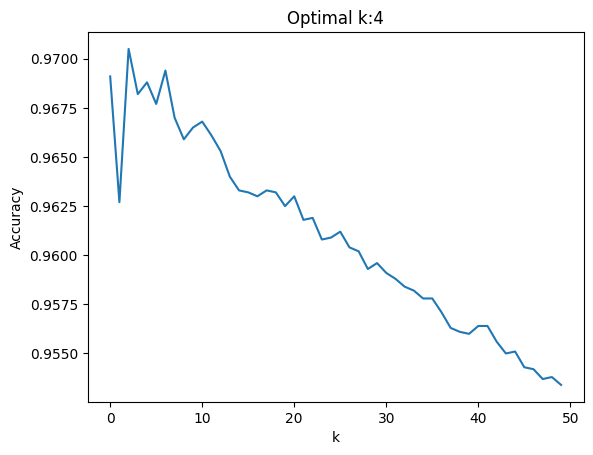

In [44]:
from sklearn.neighbors import KNeighborsClassifier

# determine optimal k:
k_bar = 50 # upper limit
k_grid = np.arange(2, k_bar) # the range of k's to consider, starting at 2
accuracy = np.zeros(k_bar) # accuracy for each k

for k in range(k_bar): # loop values and collect accuracy
    knn = KNeighborsClassifier(n_neighbors = k + 1) # create the knn model
    knn.fit(Z_train.values, y_train) # to train model
    accuracy[k] = knn.score(Z_test.values, y_test) # calculate accuracy

accuracy_max = np.max(accuracy) # highest recorded accuracy
max_index = np.argmax(accuracy) # find optimal index
k_star = k_grid[max_index] # find optimal value of k
print("Optimal k:" + str(k_star))

plt.plot(np.arange(0, k_bar), accuracy) # plot accuracy by k
plt.xlabel("k") # k values on x
plt.ylabel('Accuracy') # accuracy on y
plt.title("Optimal k:" + str(k_star)) # title
plt.show()

**5. For the optimal number of neighbors, how well does your predictor perform on the test set?**

In [45]:
knn = KNeighborsClassifier(n_neighbors = 1)  # initialize KNN model with 1 neighbor
predictor = knn.fit(Z_train.values, y_train)  # fit model on the training data

y_hat = predictor.predict(Z_test.values)  # predict labels for the test set

accuracy = knn.score(Z_test.values, y_test)  # calculate accuracy on the test set
print('Accuracy: ', accuracy) # print the accuracy

pd.crosstab(y_test, y_hat) # crosstab confusion matrix

Accuracy:  0.9691


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,973,1,1,0,0,1,3,1,0,0
1,0,1129,3,0,1,1,1,0,0,0
2,7,6,992,5,1,0,2,16,3,0
3,0,1,2,970,1,19,0,7,7,3
4,0,7,0,0,944,0,3,5,1,22
5,1,1,0,12,2,860,5,1,6,4
6,4,2,0,0,3,5,944,0,0,0
7,0,14,6,2,4,0,0,992,0,10
8,6,1,3,14,5,13,3,4,920,5


The model is approximately 96.91% accurate on the test set, meaning that 96.91% of the predictions it makes match the actual class labels.

**6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?**

The ten most common mistakes are the model confusing 4 for 9 (22 instances), confusing 3 for 5 (19 instances), confusing 7 for 2 (16 instances), confusing 7 for 1 (14 instances), confusing 8 for 3 (14 instances), confusing 8 for 5 (13 instances), confusing 5 for 3 (12 instances), confusing 9 for 7 (11 instances), confusing 9 for 4 (10 instances), and 7 for 9 (10 instances). A pattern I saw with these common mistakes was that the model confused classes which looked relatively similar (simialr features/traits) to one another. For example, 4 and 9, 3 and 5, and 2 and 7 do look somewhat similar, so it is not a surprise that the computer confused them since the k-nearest neighbor algorithm used here is relatively simple.

**7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)**

Color photos can be represented as 3D matrices. In these matrices, each pixel would be defined by three values corresponding to its RGB intensities. For an image of size 28x28 this matrix would have dimensions 28x28x3, with each pixel containing an RGB triplet. Now the image is stored as a matrix of values, and so the next step would be to flatten the RGB values for each pixel into a single row, creating a table where each row represents a pixel, and the columns represent the RGB intensities. Now, the pixel data can be used for ML tools.